In [1]:
import numpy as np
import gc
import os
import sys
sys.path.append("../")
sys.path.append("../03_experimental_data_chemical_shifts/")
import matplotlib.pyplot as plt

import SRT_optimization as srt
import handle_BMBR as BMBR
from matplotlib.backends.backend_pdf import PdfPages


gc.collect()

0

In [2]:
BMBR_path="../../../CorysPeptides/sds_vs_peptide/BMRB_experimental_data/"
PPSpred_path="../04_predict_2str_PSSpred/data/"

experiments=BMBR.load_BMBR(BMBR_path)
secondary_structure=BMBR.load_PSSpred_structure(PPSpred_path)

4697 .


In [3]:
for entry in experiments['26823']['fields']:
    print(entry)

850
500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


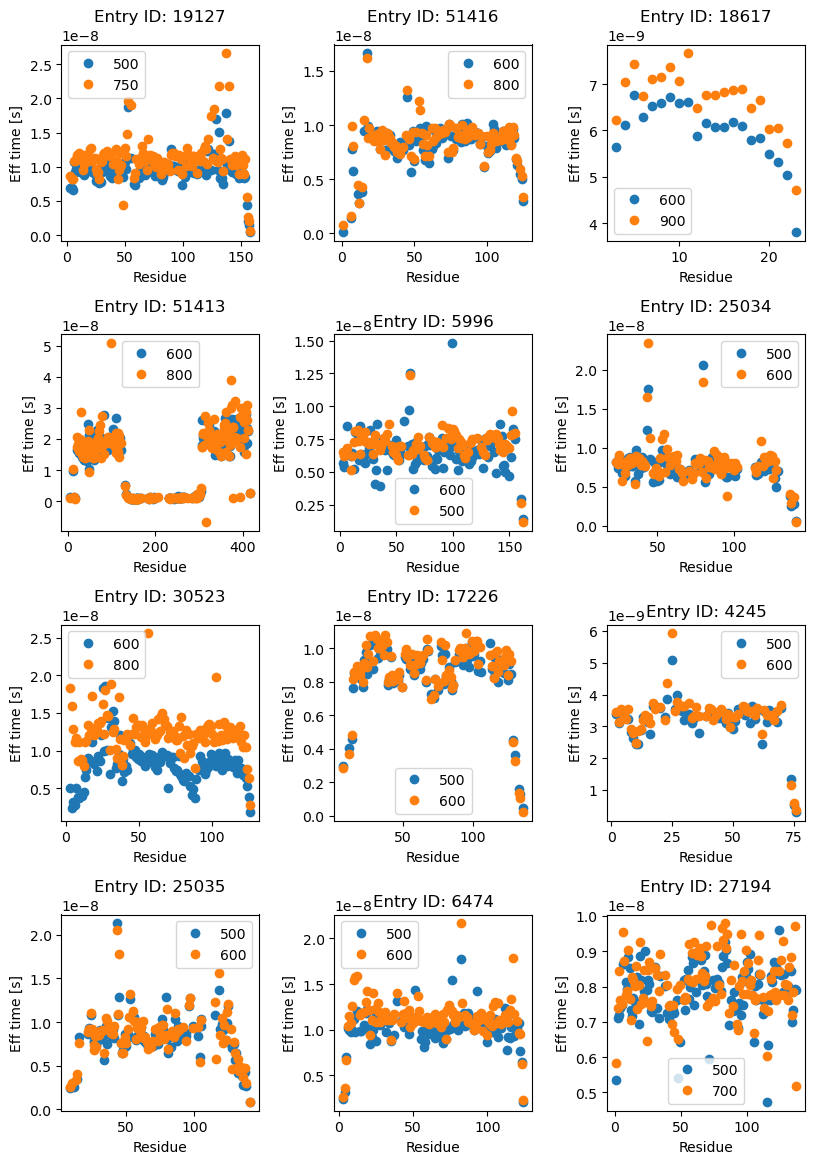

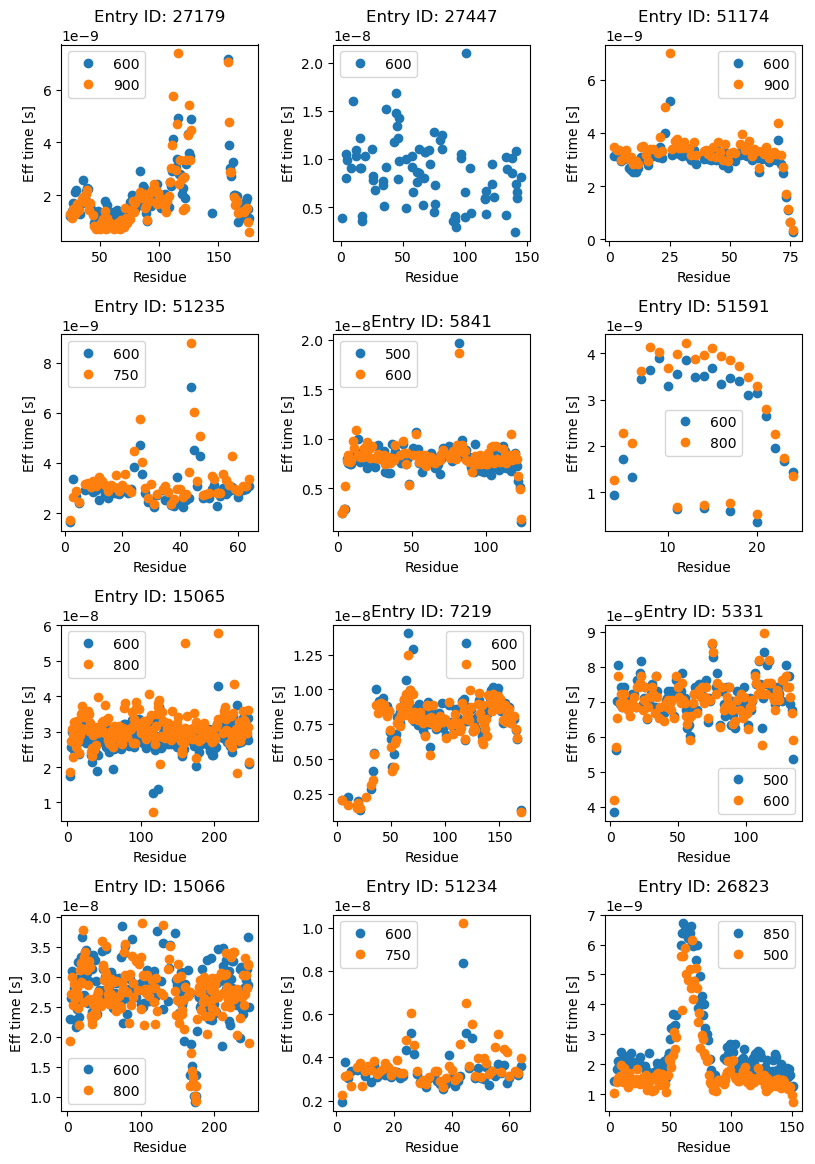

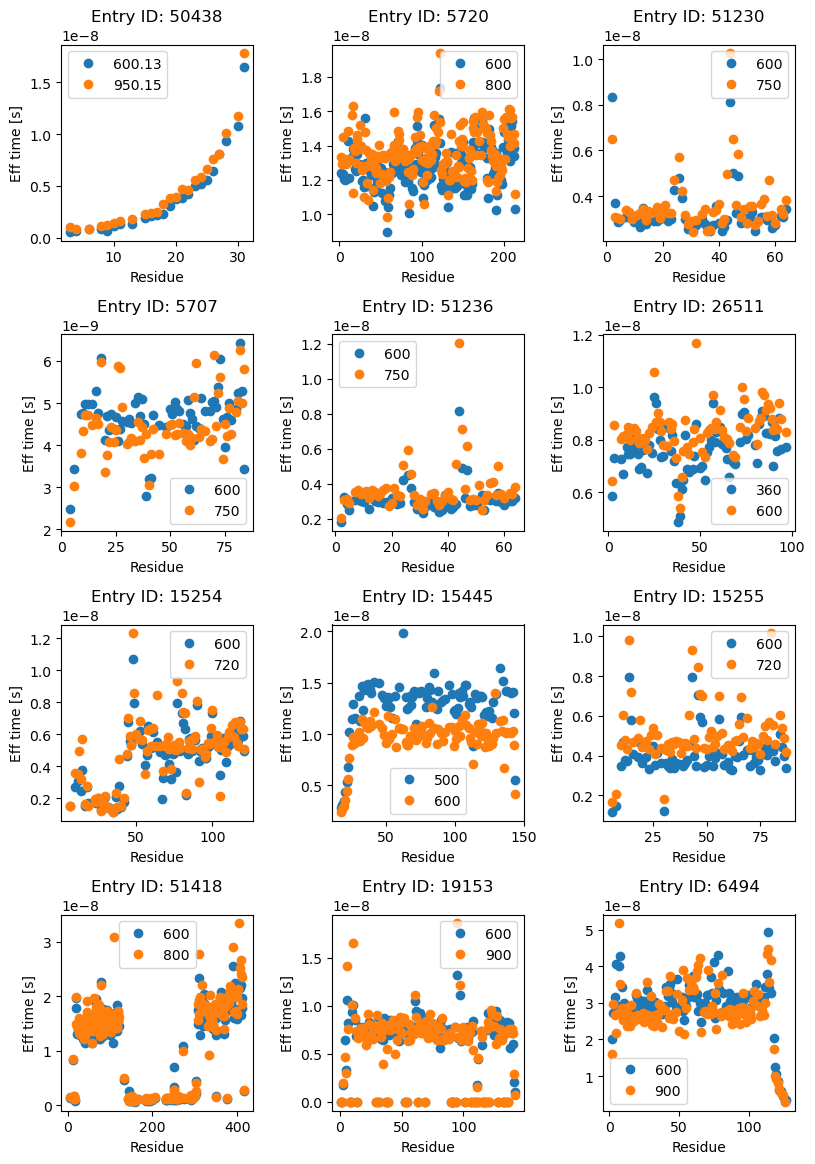

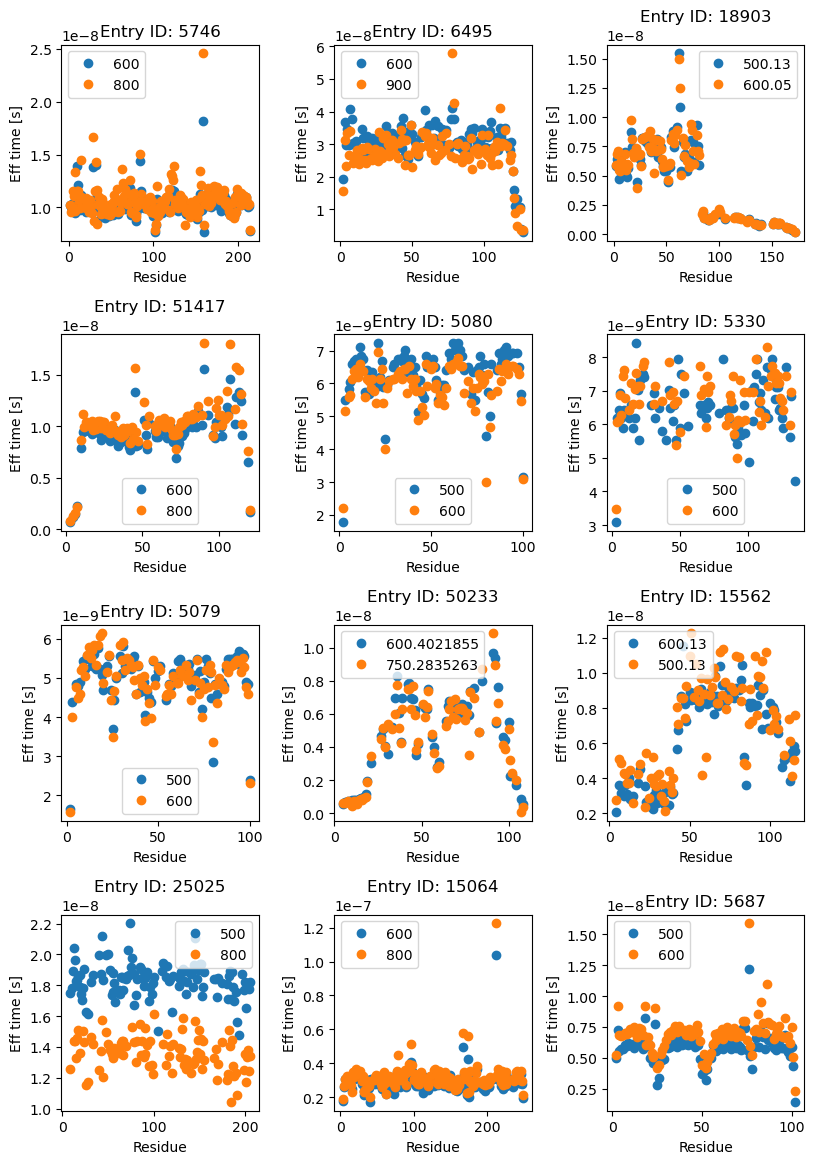

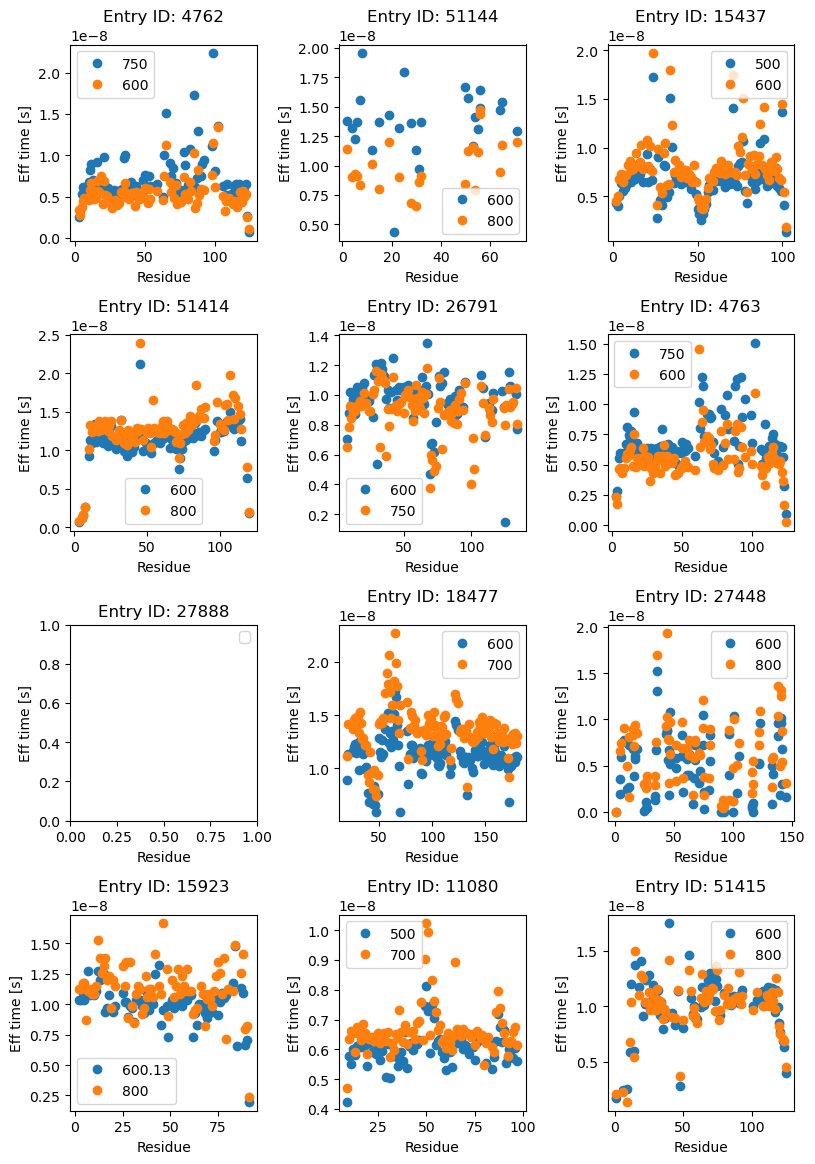

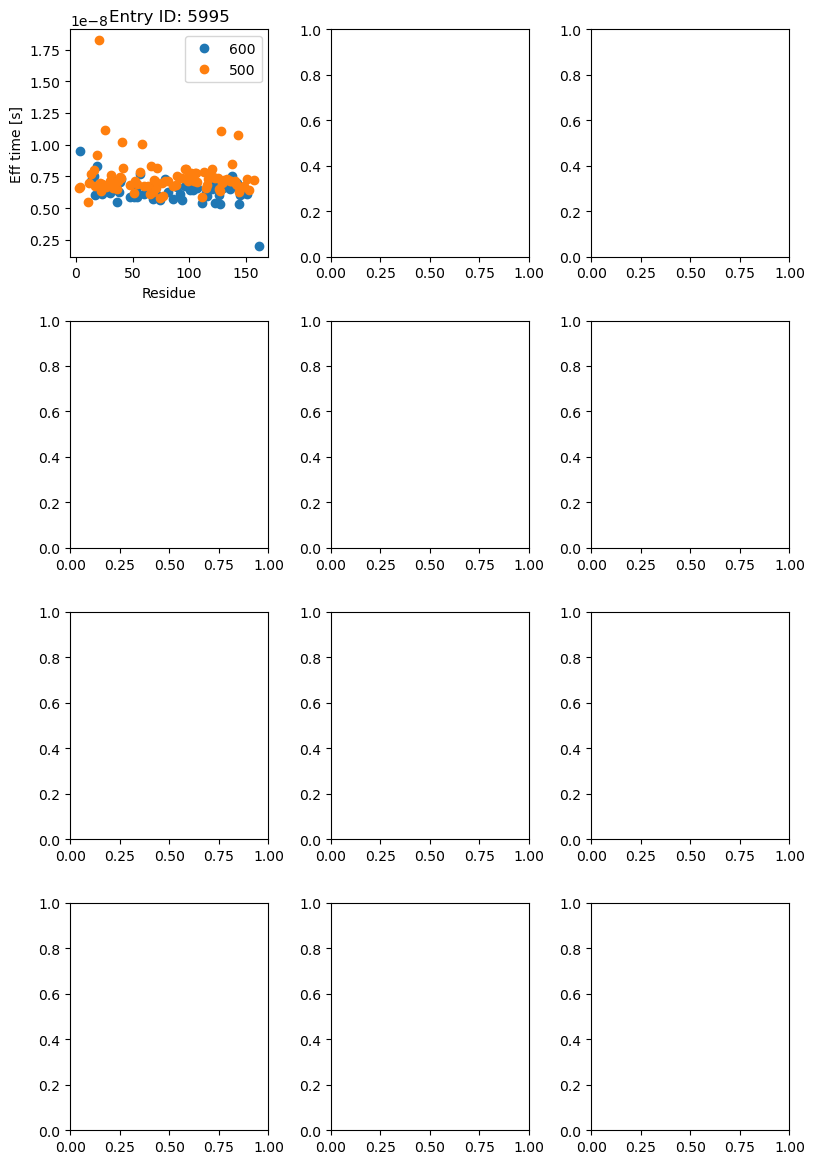

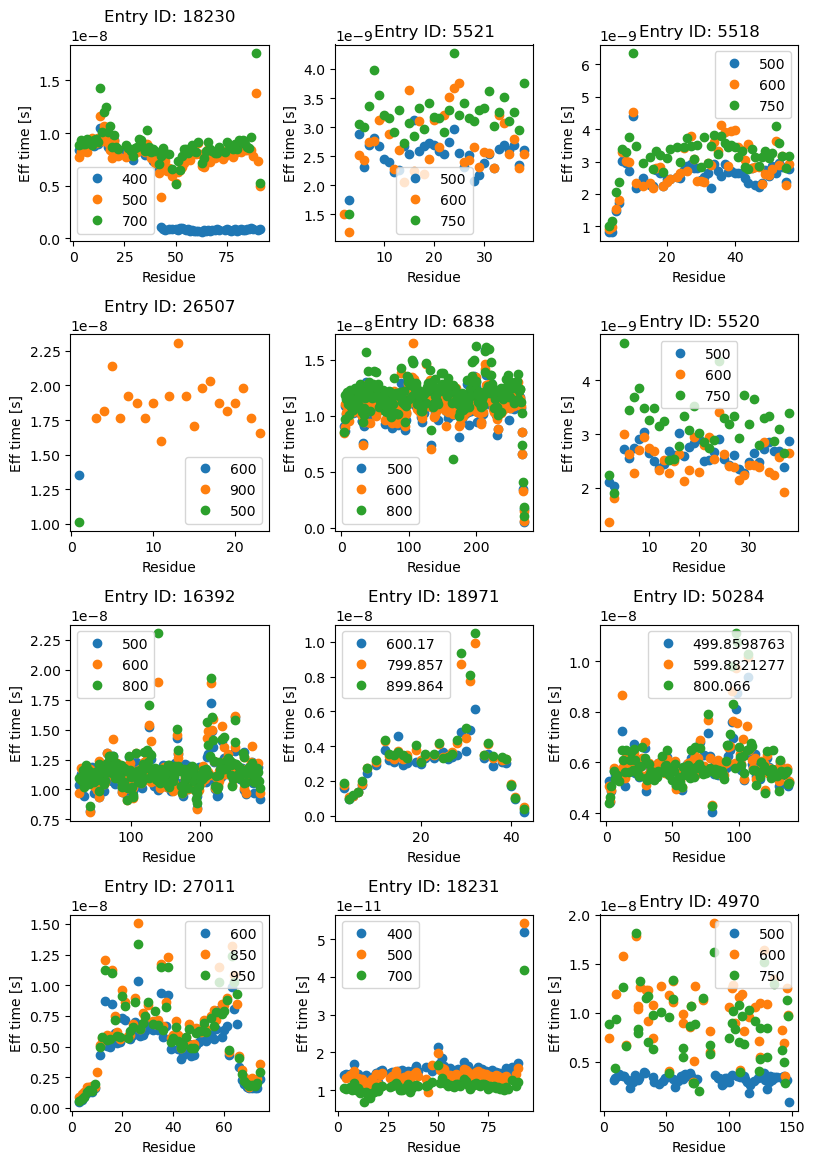

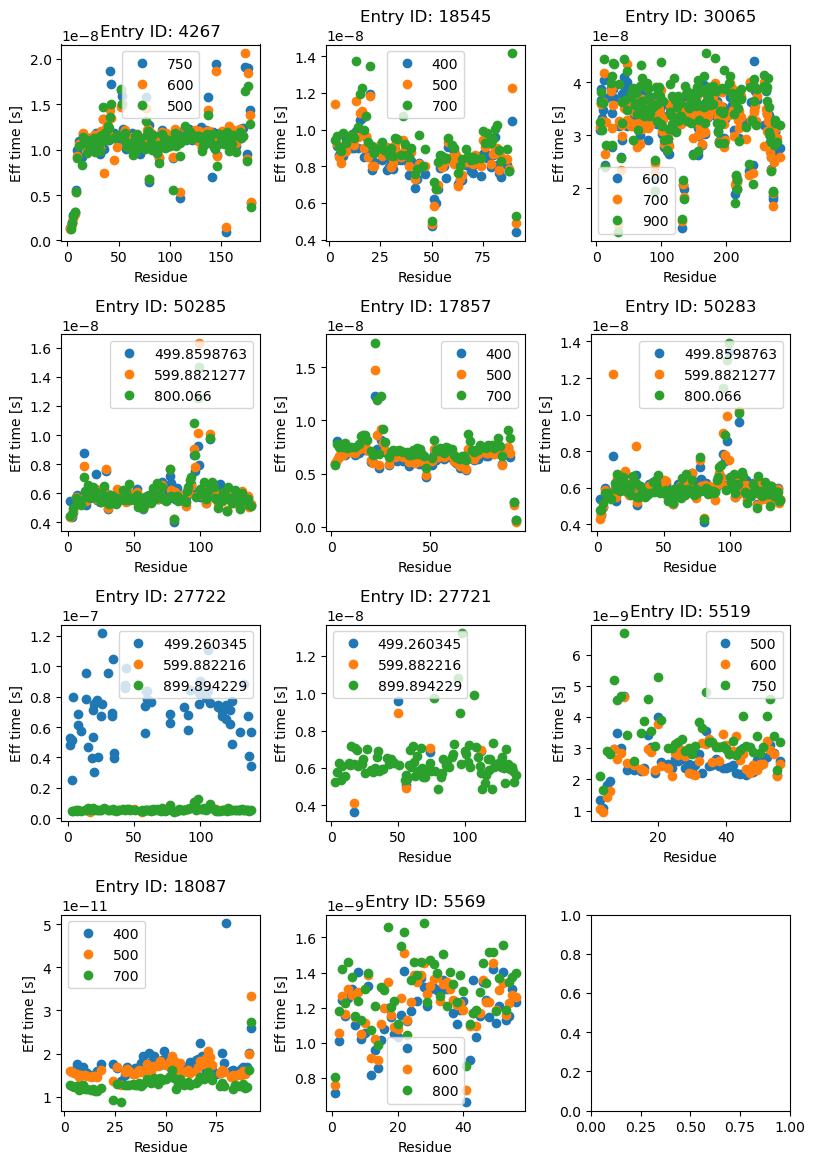

In [9]:
with PdfPages('multiple_fields.pdf') as pdf:
    plots=0
    
    plt.rcParams["figure.figsize"] = [8.25, 11.75]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(4, 3)
    
    i=0
    for entry in experiments:
        if len(experiments['fields'][entry])==2:
              
            for field in experiments[entry]:
                try:
                    effTimes=[]
                    for R2 in experiments[entry]['fields'][field]["results"]["R2"]:
                        effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                    residues=np.linspace(1,len(experiments[entry]['fields'][field]["results"]["R2"]),len(experiments[entry][field]["results"]["R2"]))
                
                    axs[int(i/3),np.mod(i,3)].plot(experiments[entry]['fields'][field]["results"]["atomID"],effTimes,"o",label=str(field))

                except:
                    pass
            
            
            e=str(entry)
            axs[int(i/3),np.mod(i,3)].legend()
            axs[int(i/3),np.mod(i,3)].set_ylabel("Eff time [s]")
            axs[int(i/3),np.mod(i,3)].set_xlabel("Residue")
            axs[int(i/3),np.mod(i,3)].set_title("Entry ID: "+e)
            i+=1
        
        if (i%12==0 and i!=0):
            i=0
            pdf.savefig()  # saves the current figure into a pdf page
            plt.rcParams["figure.figsize"] = [8.25, 11.75]
            plt.rcParams["figure.autolayout"] = True
            fig, axs = plt.subplots(4, 3)
    
    pdf.savefig()         
            
            
    plt.rcParams["figure.figsize"] = [8.25, 11.75]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(4, 3)
    
    
    i=0
    for entry in experiments:
        if len(experiments[entry]['fields'])==7:
            
            for field in experiments[entry]['fields']:
                try:
                    effTimes=[]
                    for R2 in experiments[entry]['fields'][field]["results"]["R2"]:
                        effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                    residues=np.linspace(1,len(experiments[entry]['fields'][field]["results"]["R2"]),len(experiments[entry]['fields'][field]["results"]["R2"]))
                
                    axs[int(i/3),np.mod(i,3)].plot(experiments[entry]['fields'][field]["results"]["atomID"],effTimes,"o",label=str(field))

                except:
                    pass
            e=str(entry)
            axs[int(i/3),np.mod(i,3)].legend()
            axs[int(i/3),np.mod(i,3)].set_ylabel("Eff time [s]")
            axs[int(i/3),np.mod(i,3)].set_xlabel("Residue")
            axs[int(i/3),np.mod(i,3)].set_title("Entry ID: "+e)
            i+=1
        
        if (i%12==0 and i!=0):
            i=0
            pdf.savefig()  # saves the current figure into a pdf page

            
            plt.rcParams["figure.figsize"] = [8.25, 11.75]
            plt.rcParams["figure.autolayout"] = True
            fig, axs = plt.subplots(4, 3)
    
    pdf.savefig() 
    plt.rcParams["figure.figsize"] = [8.25, 11.75]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(4, 3)
    
    
    i=0
    for entry in experiments:
        if len(experiments[entry]['fields'])==8:
            
            for field in experiments[entry]:
                try:
                    effTimes=[]
                    for R2 in experiments[entry]['fields'][field]["results"]["R2"]:
                        effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                    residues=np.linspace(1,len(experiments[entry]['fields'][field]["results"]["R2"]),len(experiments[entry]['fields'][field]["results"]["R2"]))
                
                    axs[int(i/3),np.mod(i,3)].plot(experiments[entry]['fields'][field]["results"]["atomID"],effTimes,"o",label=str(field))

                except:
                    pass
            e=str(entry)
            axs[int(i/3),np.mod(i,3)].legend()
            axs[int(i/3),np.mod(i,3)].set_ylabel("Eff time [s]")
            axs[int(i/3),np.mod(i,3)].set_xlabel("Residue")
            axs[int(i/3),np.mod(i,3)].set_title("Entry ID: "+e)
            i+=1
        
        if (i%12==0 and i!=0):
            i=0
            pdf.savefig()  # saves the current figure into a pdf page
            
            
            plt.rcParams["figure.figsize"] = [8.25, 11.75]
            plt.rcParams["figure.autolayout"] = True
            fig, axs = plt.subplots(4, 3)
    
    pdf.savefig() 
    plt.close()

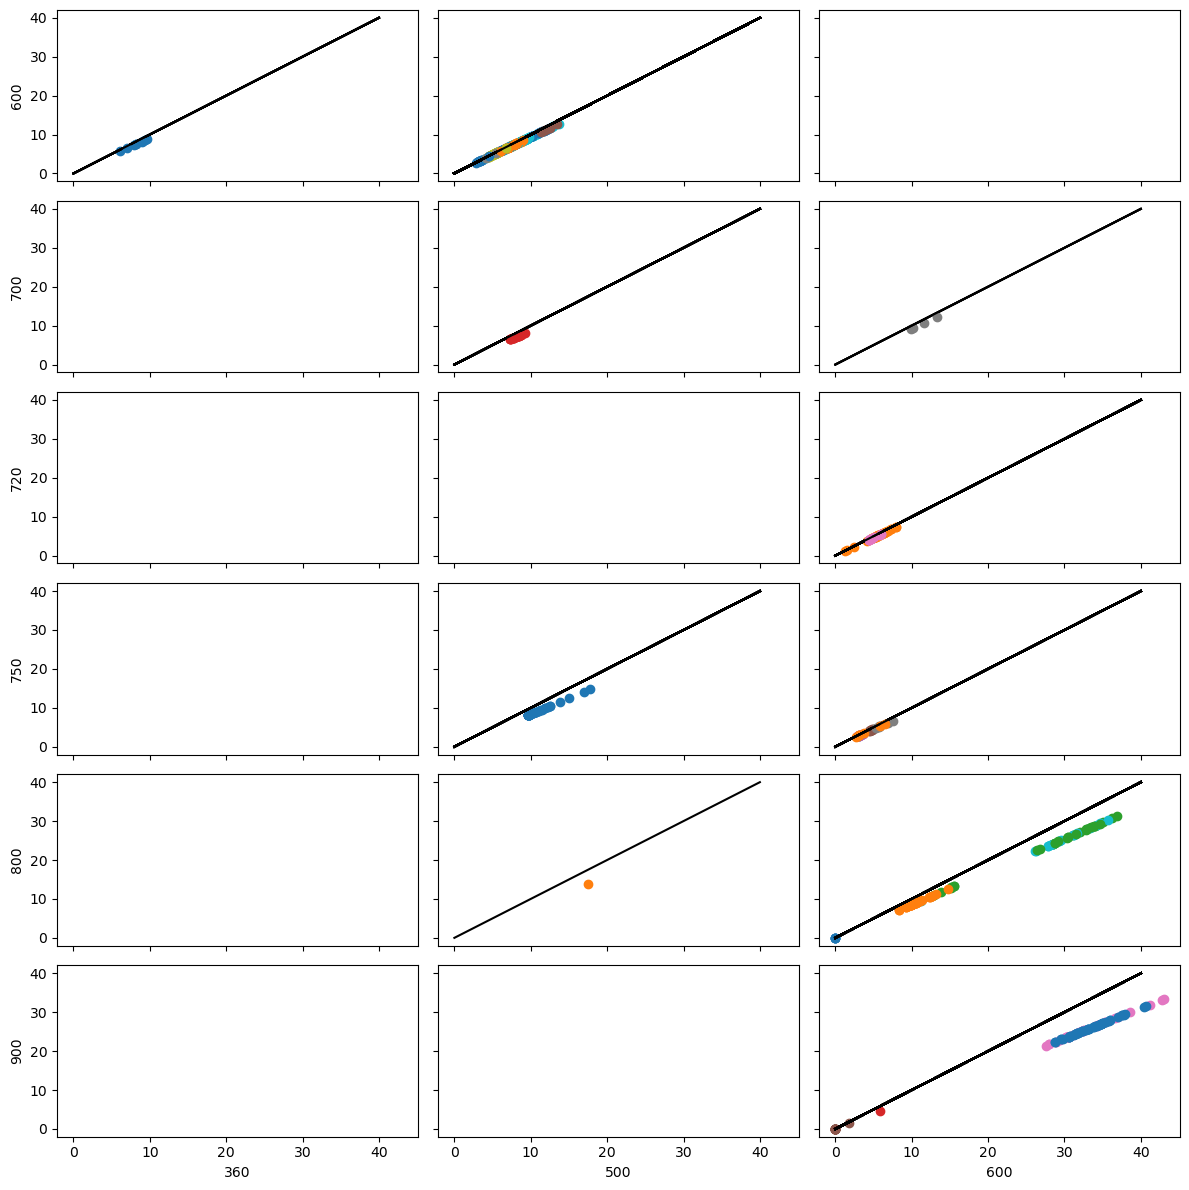

In [6]:
plt.rcParams["figure.autolayout"] = True
smallers={360:0,500:1,600:2}
biggers={600:0,700:1,720:2,750:3,800:4,900:5}
fig, axs = plt.subplots(6,3,figsize=(12,12),sharex=True,sharey=True)
for cont,entry in enumerate(experiments):
    if len(experiments[entry]['fields'])==2:         
        bigger=0
        smaller=10000
        for field in experiments[entry]['fields']:
            try:
                nu=int(float(field))
                bigger=max(bigger,nu)
                if bigger==int(float(field)):
                    bigger_s=field
                smaller=min(smaller,nu)
                if smaller==int(float(field)):
                    smaller_s=field
            except Exception as e:
                pass
            
        
        small=[]
        for R2 in experiments[entry]['fields'][smaller_s]["results"]["R2"]:
            try:
                small.append(srt.find_tau_from_R2_np_poly1d(float(smaller_s),float(R2))*10**9)
            except:
                small.append(None)
                
        
        big=[]

        for R2 in experiments[entry]['fields'][bigger_s]["results"]["R2"]:
            try:
                big.append(srt.find_tau_from_R2_np_poly1d(float(bigger_s),float(R2))*10**9)
            except:
                big.append(None)
        for pos,res in enumerate(experiments[entry]['fields'][smaller_s]["results"]["R2"]):
            if res in experiments[entry]['fields'][bigger_s]["results"]["R2"]:
                pos_big=experiments[entry]['fields'][bigger_s]["results"]["R2"].index(res)
                if not small[pos]==None and not big[pos_big]==None:
                    axs[biggers[bigger],smallers[smaller]].plot(small[pos],big[pos_big],"o",c="C"+str(cont))
                    axs[biggers[bigger],smallers[smaller]].plot([0,40],[0,40],'-',c="black")
for xlabel,column in smallers.items():
    axs[5,column].set_xlabel(xlabel)
    
for ylabel,row in biggers.items():
    axs[row,0].set_ylabel(ylabel)

In [11]:
sorted(list(experiments['5569']['fields'].keys()))

['500', '600', '800']

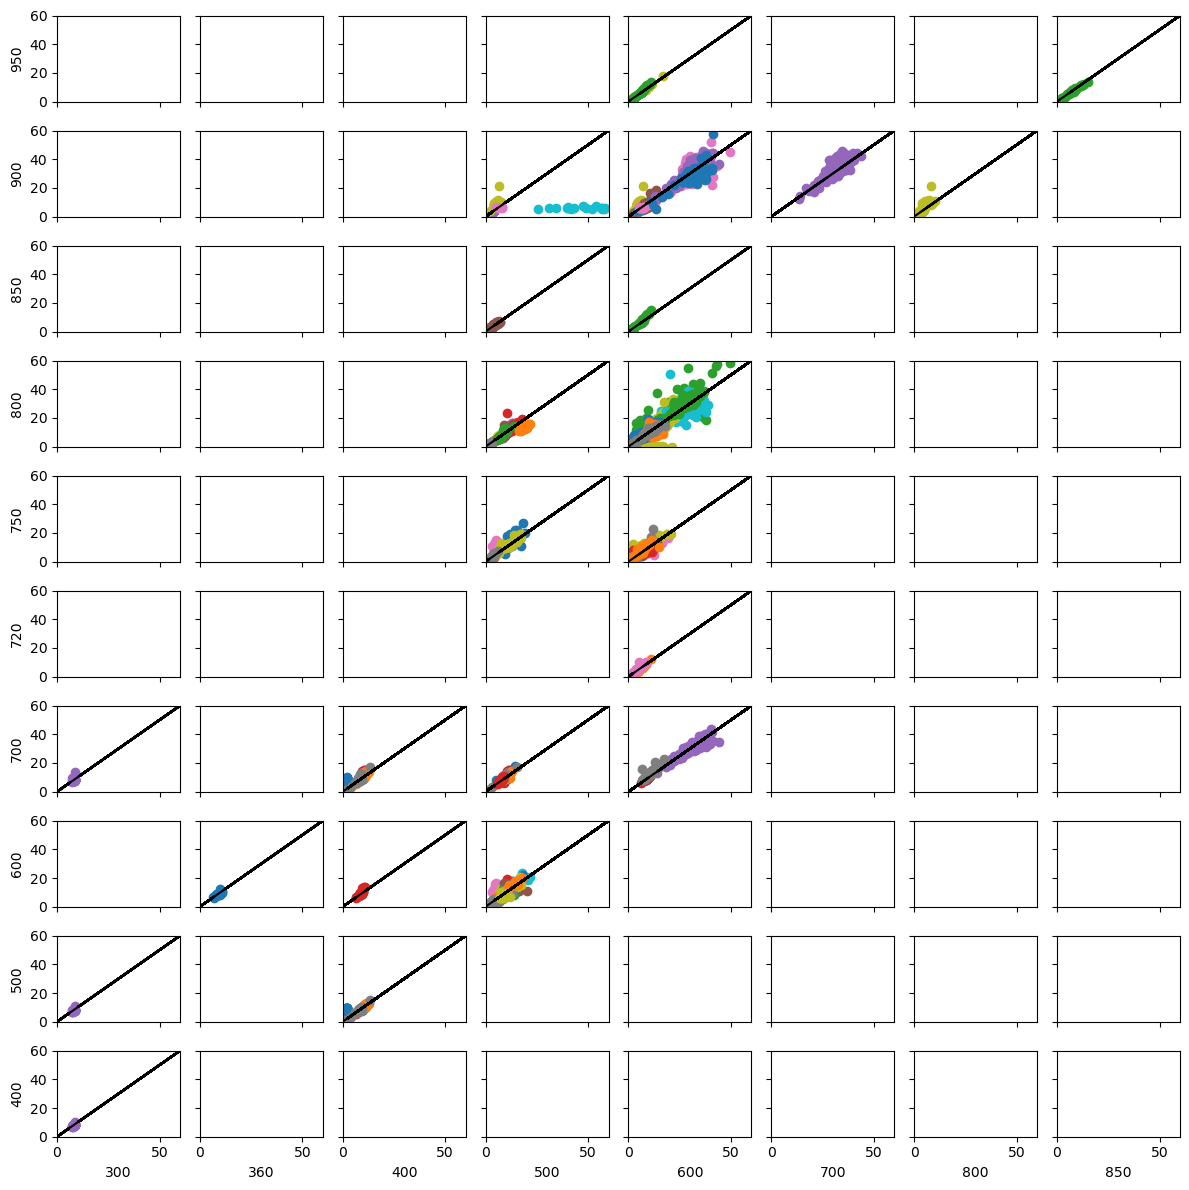

In [34]:
plt.rcParams["figure.autolayout"] = True
smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}




fig, axs = plt.subplots(10,8,figsize=(12,12),sharex=True,sharey=True)
S=[]
B=[]
for i,entry in enumerate(experiments):
    if len(experiments[entry]['fields'])>1:
        fields=sorted(list(experiments[entry]['fields'].keys()))
        for smaller_c in range(len(fields)):
            for bigger_c in range(smaller_c+1,len(fields)):
                #print(fields[smaller],fields[bigger])
                if int(float(fields[smaller_c])) not in S:
                    if int(float(fields[smaller_c]))%10==0:
                        smaller=(int(float(fields[smaller_c])))
                        smaller_s=fields[smaller_c]
                    else:
                        smaller=(int(float(fields[smaller_c])))+1
                        smaller_s=fields[smaller_c]
                if int(float(fields[bigger_c])) not in B:
                    if int(float(fields[bigger_c]))%10==0:
                        bigger=(int(float(fields[bigger_c])))
                        bigger_s=fields[bigger_c]
                    else:
                        bigger=(int(float(fields[bigger_c])))+1
                        bigger_s=fields[bigger_c]

       
                small=[]
                for R2 in experiments[entry]['fields'][smaller_s]["results"]["R2"]:
                    try:
                        #small.append(srt.find_tau_from_R2_np_poly1d(float(smaller_s),float(R2))*10**9)
                        small.append(srt.find_tau_from_R2_hyperbolic_approximation(float(smaller_s),float(R2))*10**9)
                    except:
                        small.append(None)


                big=[]
                for R2 in experiments[entry]['fields'][bigger_s]["results"]["R2"]:
                    try:
                        #big.append(srt.find_tau_from_R2_np_poly1d(float(bigger_s),float(R2))*10**9)
                        big.append(srt.find_tau_from_R2_hyperbolic_approximation(float(bigger_s),float(R2))*10**9)
                    except:
                        big.append(None)
                for pos,res in enumerate(experiments[entry]['fields'][smaller_s]["results"]["atomID"]):
                    if res in experiments[entry]['fields'][bigger_s]["results"]["atomID"]:
                        pos_big=experiments[entry]['fields'][bigger_s]["results"]["atomID"].index(res)
                        if not small[pos]==None and not big[pos_big]==None:
                            axs[biggers[bigger],smallers[smaller]].plot(small[pos],big[pos_big],"o",c="C"+str(i))
                            axs[biggers[bigger],smallers[smaller]].plot([0,60],[0,60],'-',c='black')  

for xlabel,column in smallers.items():
    axs[9,column].set_xlabel(xlabel)
    
for ylabel,row in biggers.items():
    axs[row,0].set_ylabel(ylabel)
    
axs[0,0].set_ylim(0,60)
axs[0,0].set_xlim(0,60)
    
plt.savefig("field_dependency_lin_approx.png")

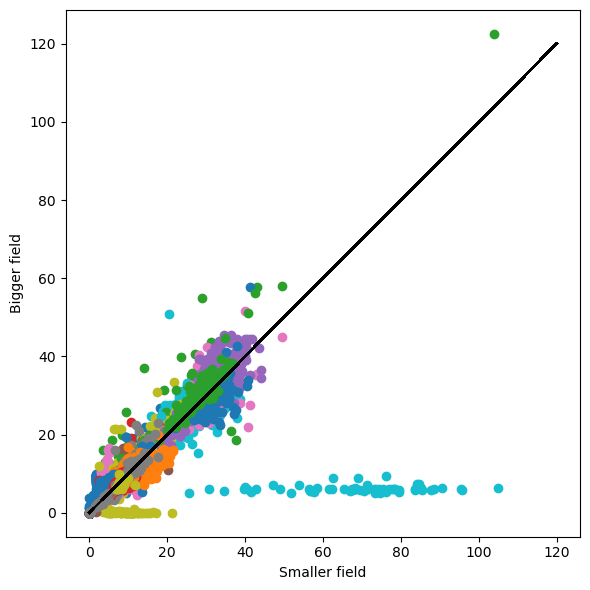

In [33]:
plt.rcParams["figure.autolayout"] = True
smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}




fig, axs = plt.subplots(1,1,figsize=(6,6),sharex=True,sharey=True)
S=[]
B=[]
for i,entry in enumerate(experiments):
    if len(experiments[entry]['fields'])>1:
        fields=sorted(list(experiments[entry]['fields'].keys()))
        for smaller_c in range(len(fields)):
            for bigger_c in range(smaller_c+1,len(fields)):
                #print(fields[smaller],fields[bigger])
                if int(float(fields[smaller_c])) not in S:
                    if int(float(fields[smaller_c]))%10==0:
                        smaller=(int(float(fields[smaller_c])))
                        smaller_s=fields[smaller_c]
                    else:
                        smaller=(int(float(fields[smaller_c])))+1
                        smaller_s=fields[smaller_c]
                if int(float(fields[bigger_c])) not in B:
                    if int(float(fields[bigger_c]))%10==0:
                        bigger=(int(float(fields[bigger_c])))
                        bigger_s=fields[bigger_c]
                    else:
                        bigger=(int(float(fields[bigger_c])))+1
                        bigger_s=fields[bigger_c]

       
                small=[]
                for R2 in experiments[entry]['fields'][smaller_s]["results"]["R2"]:
                    try:
                        #small.append(srt.find_tau_from_R2_np_poly1d(float(smaller_s),float(R2))*10**9)
                        small.append(srt.find_tau_from_R2_hyperbolic_approximation(float(smaller_s),float(R2))*10**9)
                    except:
                        small.append(None)


                big=[]
                for R2 in experiments[entry]['fields'][bigger_s]["results"]["R2"]:
                    try:
                        #big.append(srt.find_tau_from_R2_np_poly1d(float(bigger_s),float(R2))*10**9)
                        big.append(srt.find_tau_from_R2_hyperbolic_approximation(float(bigger_s),float(R2))*10**9)
                    except:
                        big.append(None)
                for pos,res in enumerate(experiments[entry]['fields'][smaller_s]["results"]["atomID"]):
                    if res in experiments[entry]['fields'][bigger_s]["results"]["atomID"]:
                        pos_big=experiments[entry]['fields'][bigger_s]["results"]["atomID"].index(res)
                        if not small[pos]==None and not big[pos_big]==None:
                            axs.plot(small[pos],big[pos_big],"o",c="C"+str(i))
                            axs.plot([0,120],[0,120],'-',c='black')  
               


axs.set_xlabel("Smaller field")
    
axs.set_ylabel("Bigger field")
plt.savefig("all_fields_one_plot_lin_approx.png")

In [8]:
pwd

'/home/ricky/Documents/from_work/git/EffectiveTimes_R2/work_in_progress/08-multiple_fileds'

Text(0, 0.5, 'Bigger field')

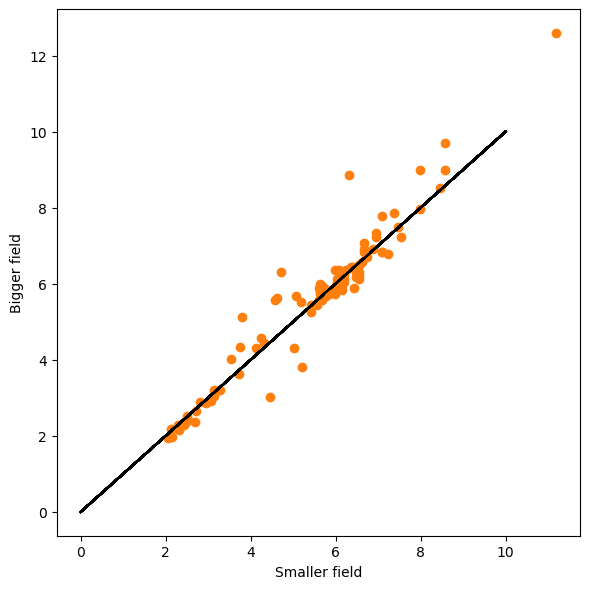

In [28]:
plt.rcParams["figure.autolayout"] = True
smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}




fig, axs = plt.subplots(1,1,figsize=(6,6),sharex=True,sharey=True)
S=[]
B=[]
for i,entry in enumerate(experiments):
    if int(entry)==15254:
        fields=sorted(list(experiments[entry]['fields'].keys()))
        for smaller_c in range(len(fields)):
            for bigger_c in range(smaller_c+1,len(fields)):
                #print(fields[smaller],fields[bigger])
                if int(float(fields[smaller_c])) not in S:
                    if int(float(fields[smaller_c]))%10==0:
                        smaller=(int(float(fields[smaller_c])))
                        smaller_s=fields[smaller_c]
                    else:
                        smaller=(int(float(fields[smaller_c])))+1
                        smaller_s=fields[smaller_c]
                if int(float(fields[bigger_c])) not in B:
                    if int(float(fields[bigger_c]))%10==0:
                        bigger=(int(float(fields[bigger_c])))
                        bigger_s=fields[bigger_c]
                    else:
                        bigger=(int(float(fields[bigger_c])))+1
                        bigger_s=fields[bigger_c]

       
                small=[]
                for R2 in experiments[entry]['fields'][smaller_s]["results"]["R2"]:
                    try:
                        #small.append(srt.find_tau_from_R2_np_poly1d(float(smaller_s),float(R2))*10**9)
                        small.append(srt.find_tau_from_R2_hyperbolic_approximation(float(smaller_s),float(R2))*10**9)
                    except:
                        small.append(None)


                big=[]
                for R2 in experiments[entry]['fields'][bigger_s]["results"]["R2"]:
                    try:
                        #big.append(srt.find_tau_from_R2_np_poly1d(float(bigger_s),float(R2))*10**9)
                        big.append(srt.find_tau_from_R2_hyperbolic_approximation(float(bigger_s),float(R2))*10**9)
                    except:
                        big.append(None)
                for pos,res in enumerate(experiments[entry]['fields'][smaller_s]["results"]["atomID"]):
                    if res in experiments[entry]['fields'][bigger_s]["results"]["atomID"]:
                        pos_big=experiments[entry]['fields'][bigger_s]["results"]["atomID"].index(res)
                        if not small[pos]==None and not big[pos_big]==None:
                            axs.plot(small[pos],big[pos_big],"o",c="C"+str(i))
                            axs.plot([0,10],[0,10],'-',c='black')  
               


axs.set_xlabel("Smaller field")
    
axs.set_ylabel("Bigger field")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

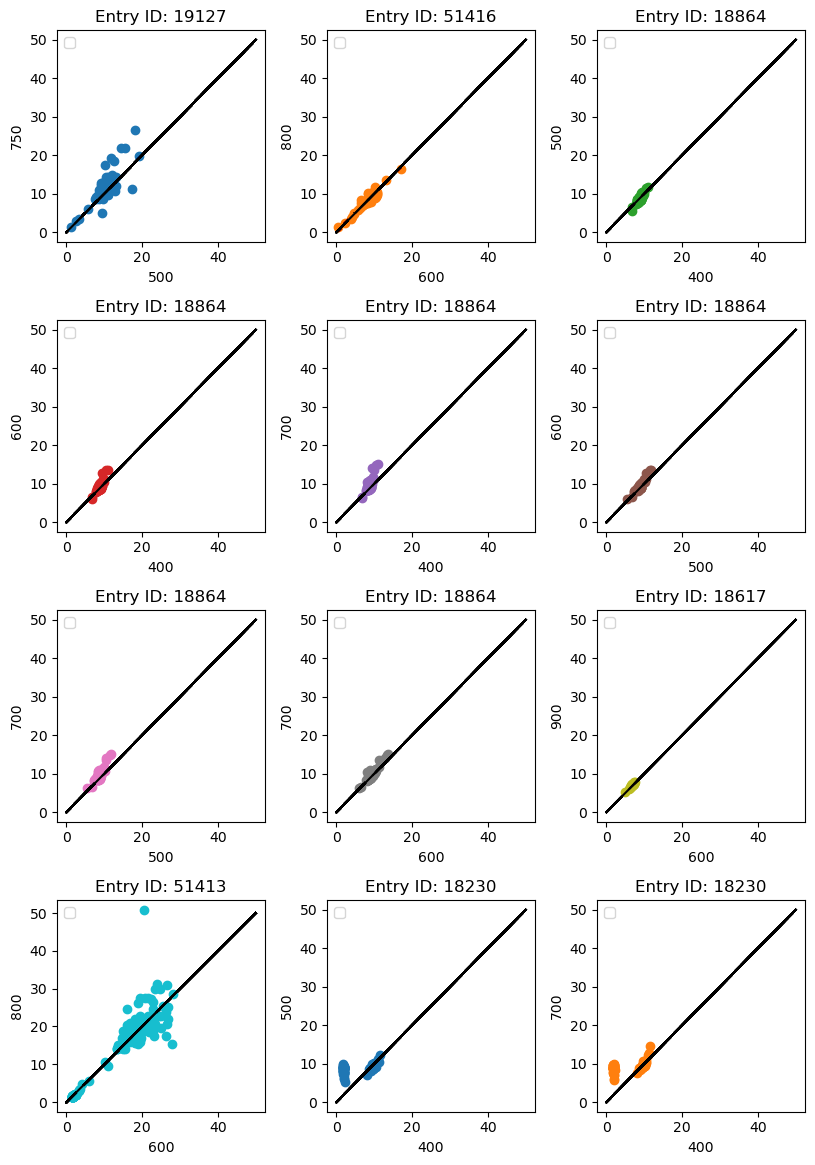

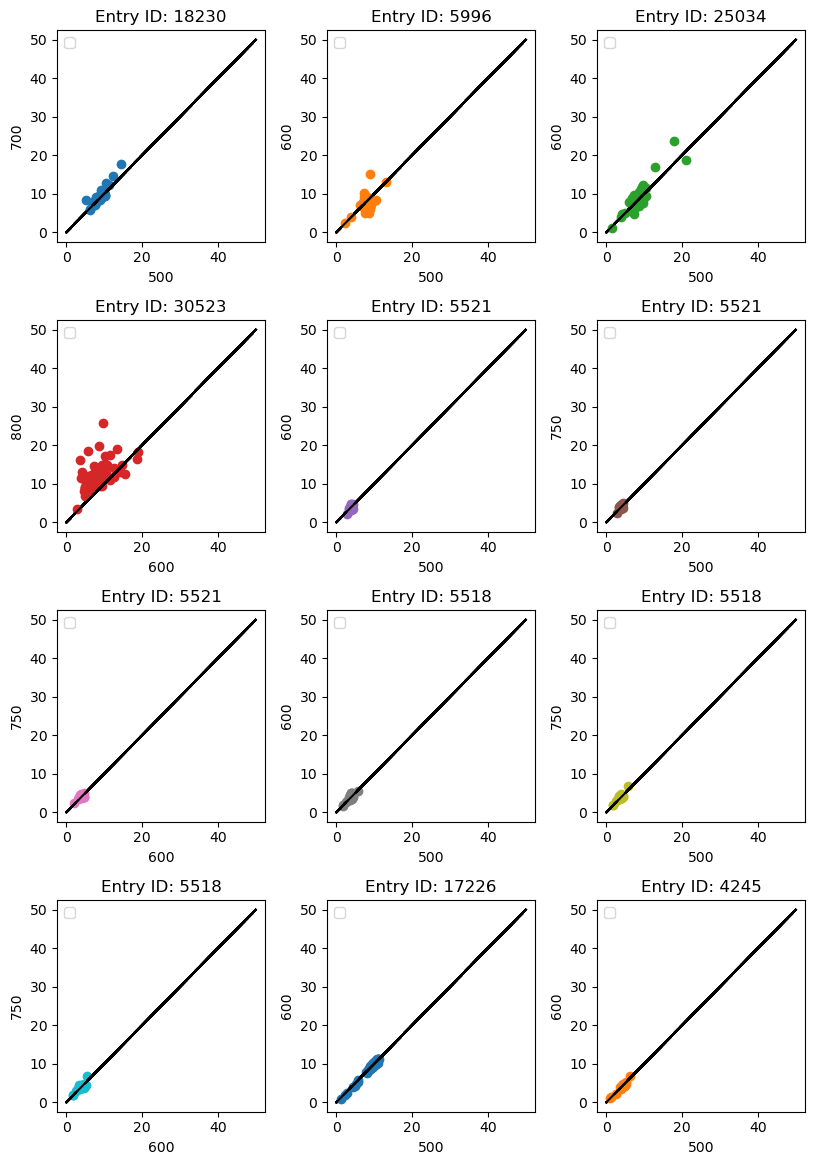

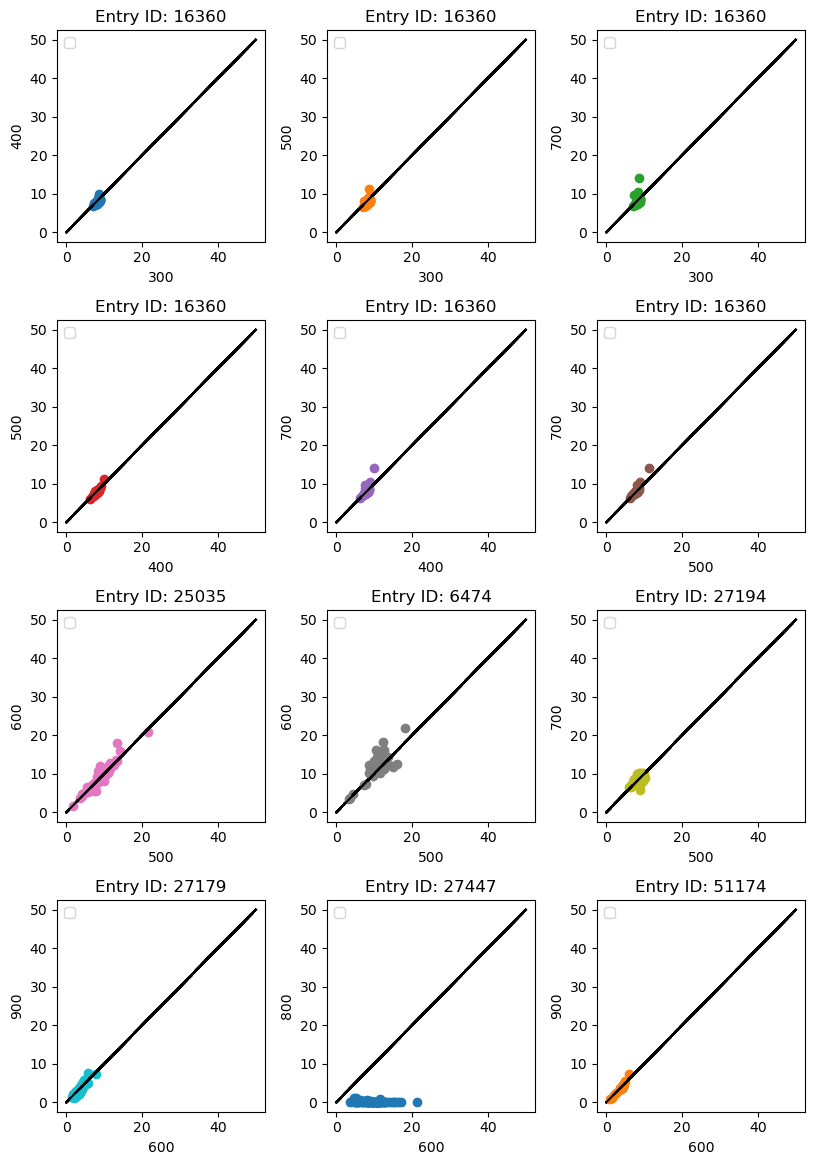

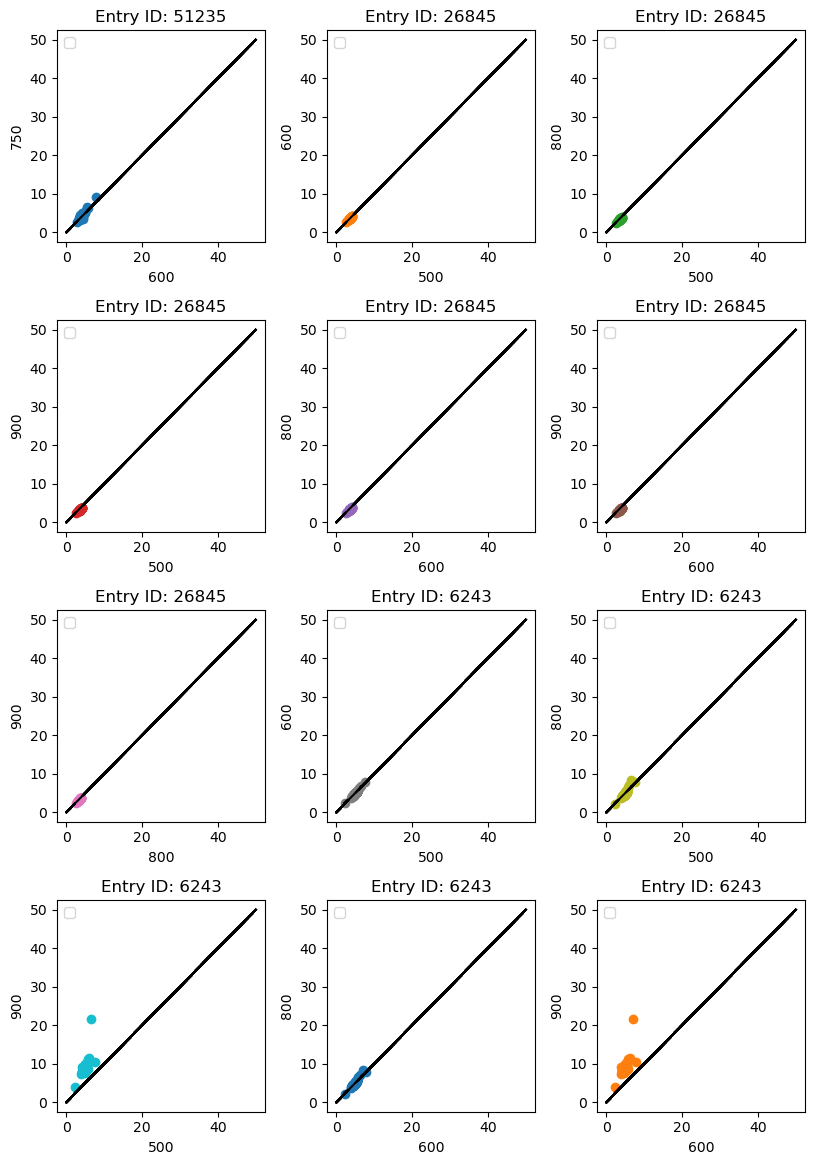

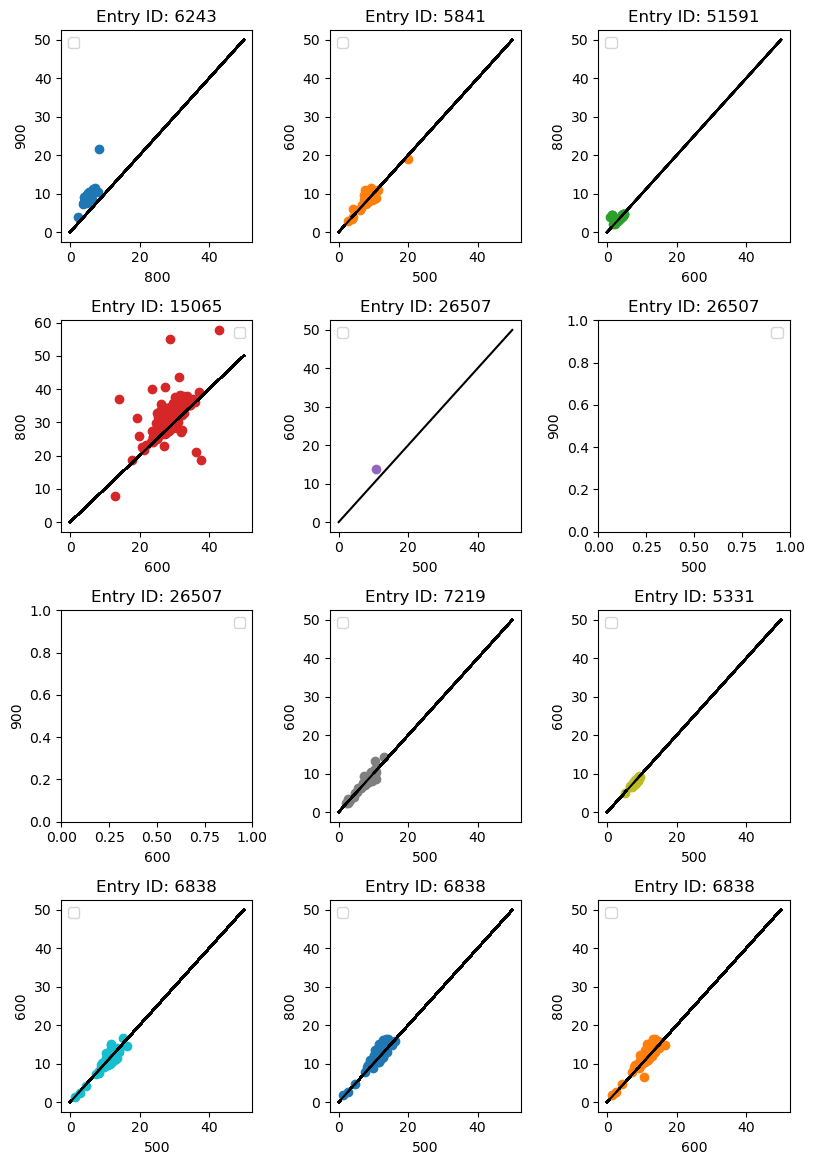

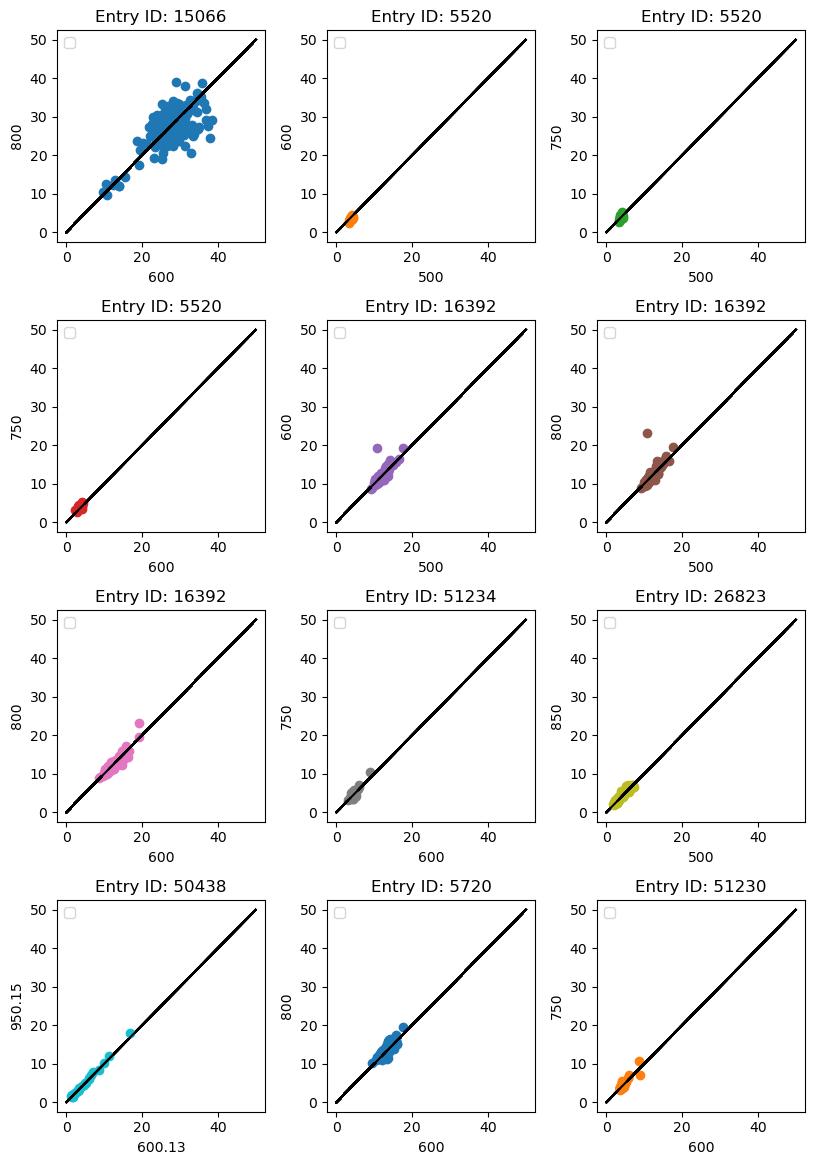

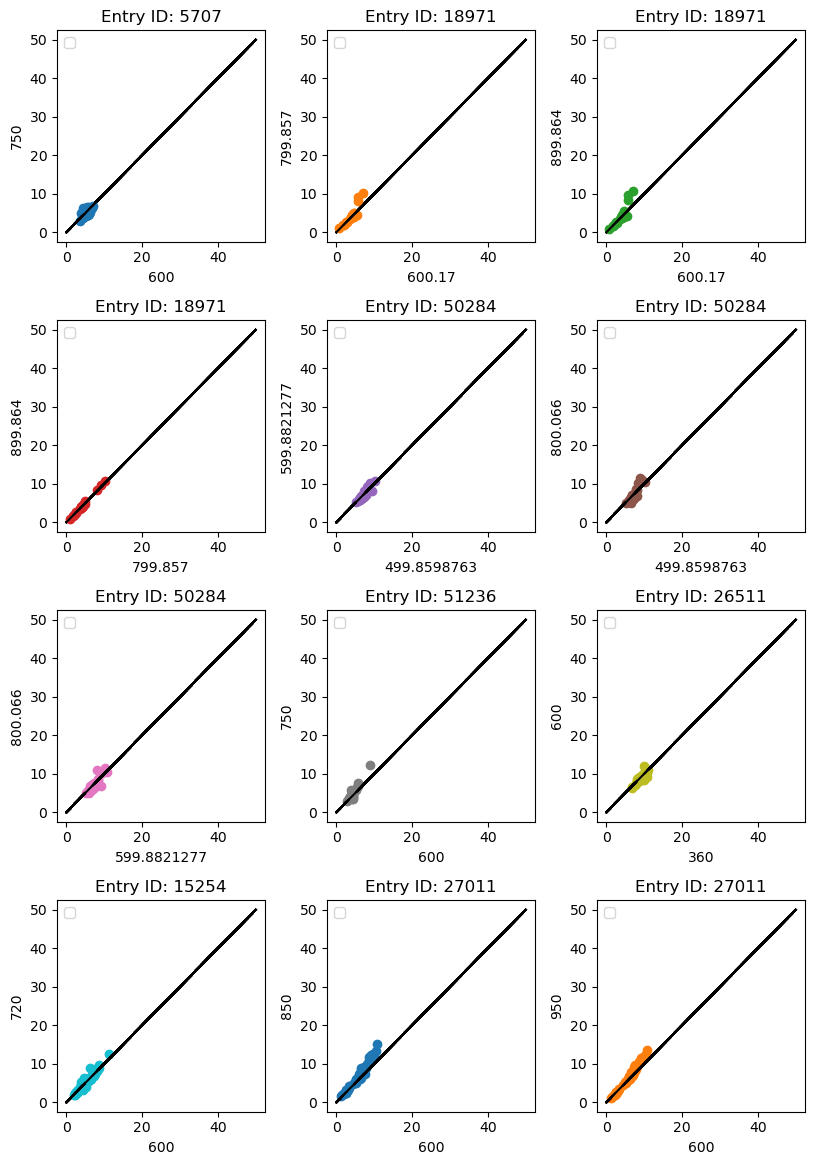

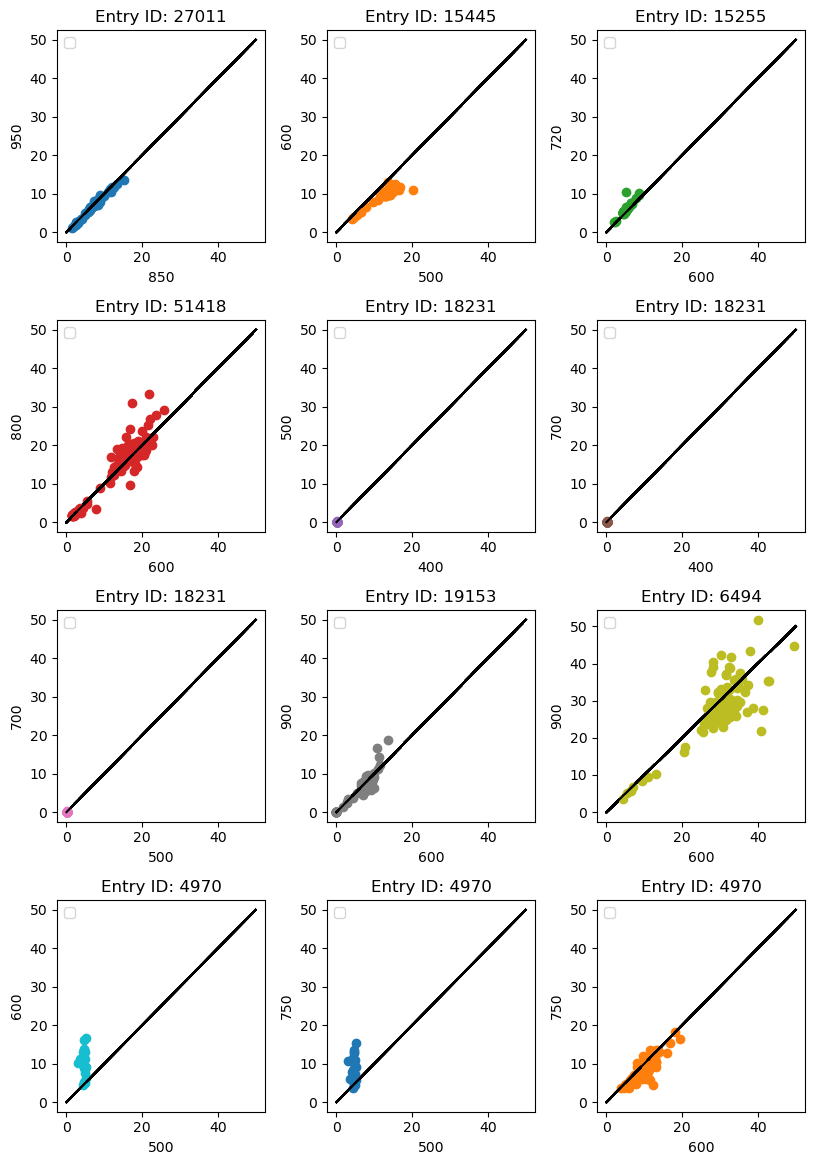

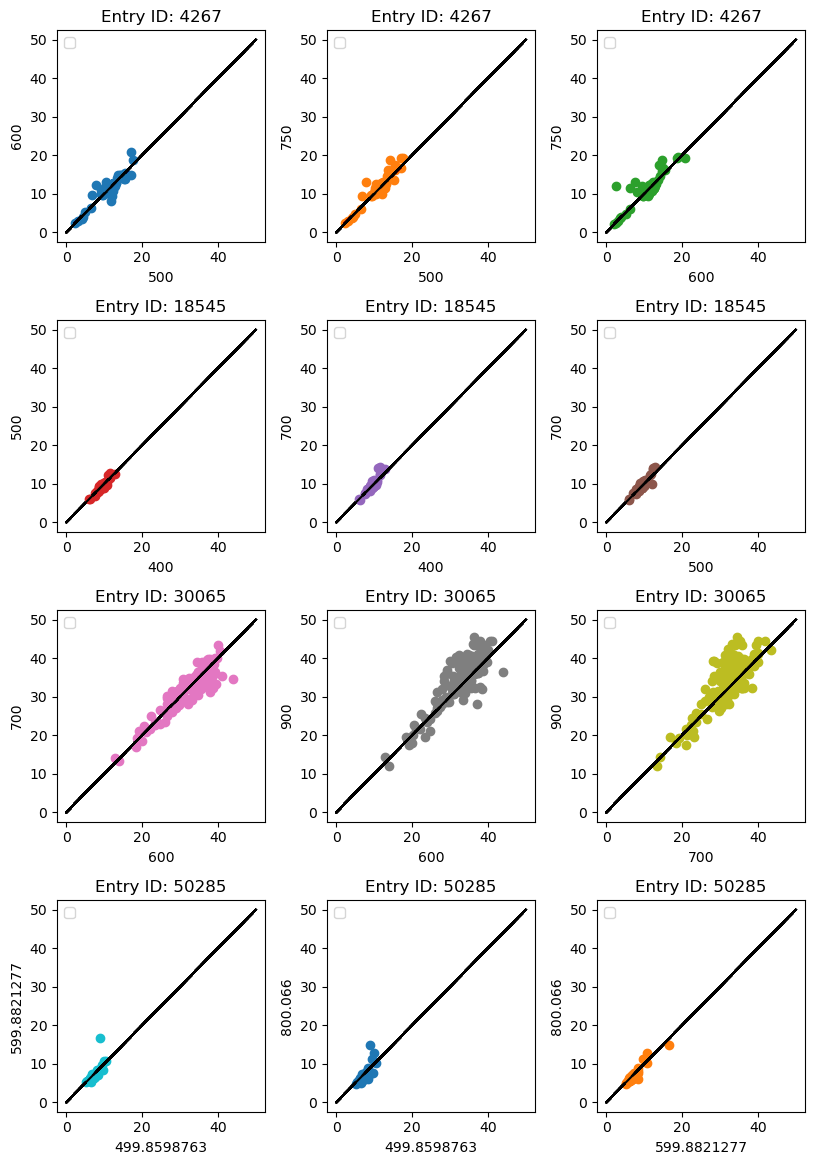

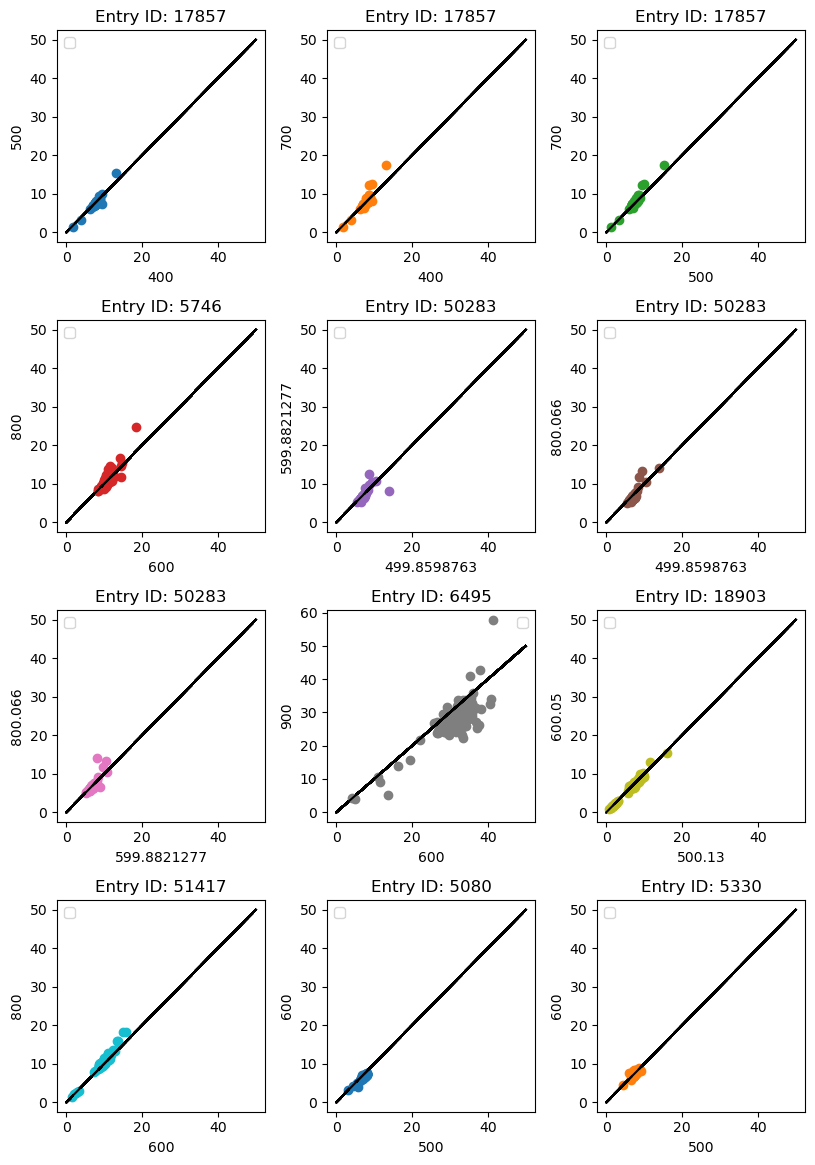

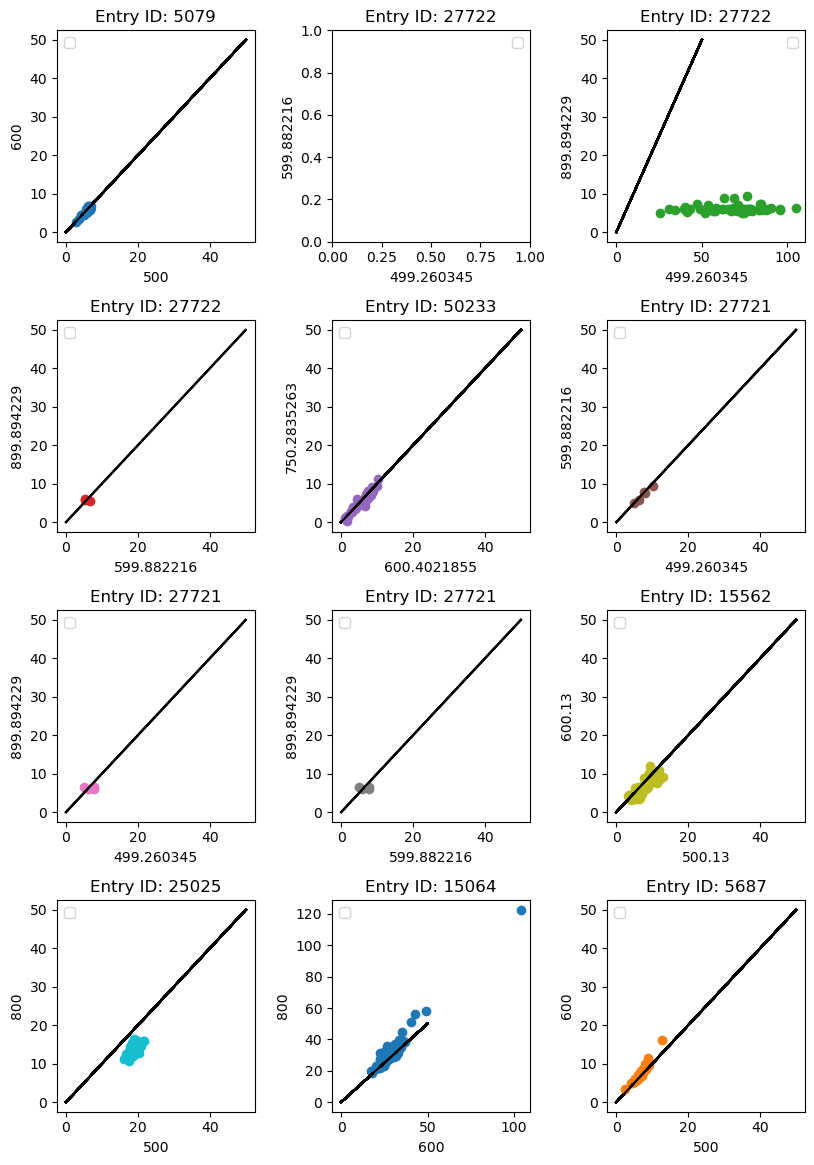

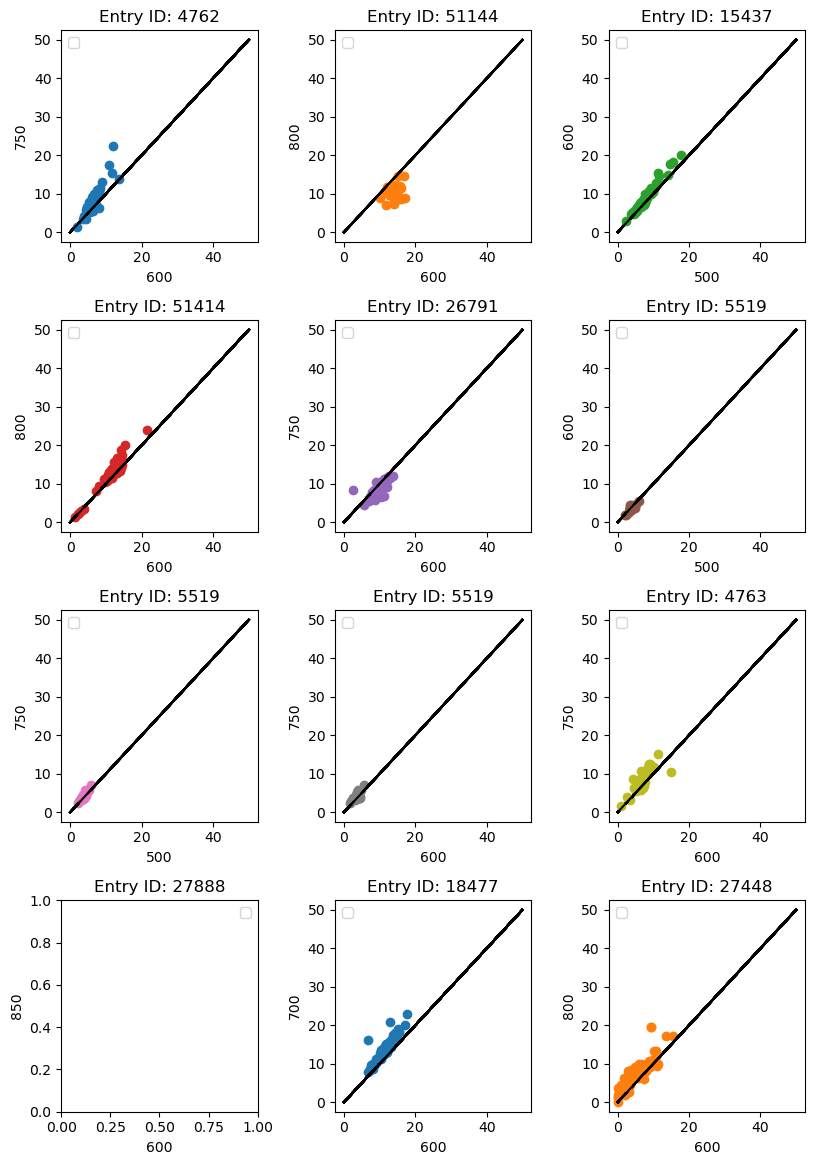

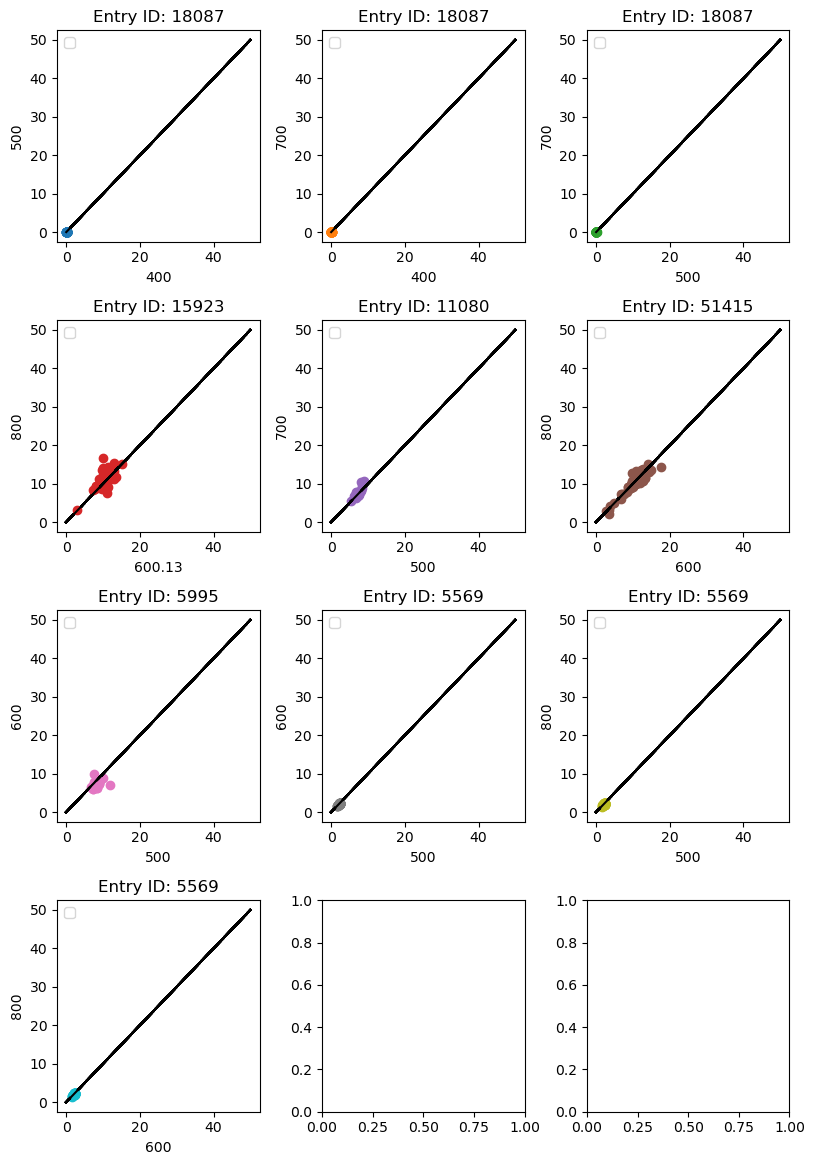

In [36]:
with PdfPages('fields_correls.pdf') as pdf:
    plots=0
    
    plt.rcParams["figure.figsize"] = [8.25, 11.75]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(4, 3)
    
    i=0
    
    
    smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
    biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}




    for entry in experiments:
        if len(experiments[entry]['fields'])>1:
            fields=sorted(list(experiments[entry]['fields'].keys()))
            for smaller_c in range(len(fields)):
                for bigger_c in range(smaller_c+1,len(fields)):
                    #print(fields[smaller],fields[bigger])
                    if int(float(fields[smaller_c])) not in S:
                        if int(float(fields[smaller_c]))%10==0:
                            smaller=(int(float(fields[smaller_c])))
                            smaller_s=fields[smaller_c]
                        else:
                            smaller=(int(float(fields[smaller_c])))+1
                            smaller_s=fields[smaller_c]
                    if int(float(fields[bigger_c])) not in B:
                        if int(float(fields[bigger_c]))%10==0:
                            bigger=(int(float(fields[bigger_c])))
                            bigger_s=fields[bigger_c]
                        else:
                            bigger=(int(float(fields[bigger_c])))+1
                            bigger_s=fields[bigger_c]


                    small=[]
                    for R2 in experiments[entry]['fields'][smaller_s]["results"]["R2"]:
                        try:
                            #small.append(srt.find_tau_from_R2_np_poly1d(float(smaller_s),float(R2))*10**9)
                            small.append(srt.find_tau_from_R2_hyperbolic_approximation(float(smaller_s),float(R2))*10**9)
                        except:
                            small.append(None)


                    big=[]
                    for R2 in experiments[entry]['fields'][bigger_s]["results"]["R2"]:
                        try:
                            #big.append(srt.find_tau_from_R2_np_poly1d(float(bigger_s),float(R2))*10**9)
                            big.append(srt.find_tau_from_R2_hyperbolic_approximation(float(bigger_s),float(R2))*10**9)
                        except:
                            big.append(None)
                    for pos,res in enumerate(experiments[entry]['fields'][smaller_s]["results"]["atomID"]):
                        if res in experiments[entry]['fields'][bigger_s]["results"]["atomID"]:
                            pos_big=experiments[entry]['fields'][bigger_s]["results"]["atomID"].index(res)
                            if not small[pos]==None and not big[pos_big]==None:
                                axs[int(i/3),np.mod(i,3)].plot(small[pos],big[pos_big],"o",c="C"+str(i))
                                axs[int(i/3),np.mod(i,3)].plot([0,50],[0,50],'-',c='black')  
                    e=str(entry)
                    axs[int(i/3),np.mod(i,3)].legend()
                    axs[int(i/3),np.mod(i,3)].set_ylabel(bigger_s)
                    axs[int(i/3),np.mod(i,3)].set_xlabel(smaller_s)
                    axs[int(i/3),np.mod(i,3)].set_title("Entry ID: "+e)
                    i+=1
                
                    
    
    
        
                    if (i%12==0 and i!=0):
                        i=0
                        pdf.savefig()  # saves the current figure into a pdf page
                        plt.rcParams["figure.figsize"] = [8.25, 11.75]
                        plt.rcParams["figure.autolayout"] = True
                        fig, axs = plt.subplots(4, 3)

    pdf.savefig()         
            